In [196]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
import laspy

import random
import math

In [197]:
las = laspy.read('banska2.las')
ground_data = las[las.classification == 2] 
points_data = np.stack([ground_data.Z], axis = 0).transpose((1,0))

points_sum = 0
data_min = min(points_data)

for i in range(len(points_data)):
    points_sum += points_data[i][0] - data_min[0]

avg_ground_height = math.floor(points_sum / len(points_data) + data_min[0])


In [198]:
las = laspy.read('banska2.las')
tree_data = las[las.classification == 5]
points_data = np.stack([tree_data.Z], axis = 0).transpose((1,0))

points_data = sorted(points_data, key=lambda x: x[0], reverse=True)
points_data = points_data[:100]

points_sum = 0
data_min = min(points_data)

for i in range(len(points_data)):
    points_sum += points_data[i][0] - data_min[0]

avg_tree_height = math.floor(points_sum / len(points_data) + data_min[0])
tree_eps = (avg_tree_height - avg_ground_height) // 4
tree_eps


522

In [199]:
las = laspy.read('banska2.las')
las = las[las.classification == 5] # stromy

points_data = np.stack([las.X,las.Y,las.Z], axis = 0).transpose((1,0))
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(points_data)
#o3d.visualization.draw_geometries([geom])

In [200]:
geom = geom.remove_radius_outlier(3,1000)[0]
#o3d.visualization.draw_geometries([geom])

In [223]:
random_colors = []
labels = np.array(geom.cluster_dbscan(tree_eps, 10))

for label in labels:
    if label == -1:
        random_colors.append([0,0,0])
    else:    
        random_colors.append([random.random()*0.8 +0.2,random.random()*0.8 +0.2,random.random()*0.8 +0.2])
colors = [random_colors[x] for x in labels]
geom.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([geom])

In [202]:
counter = 0
for i in labels:
    if i == -1:
        counter += 1

print(counter)

144


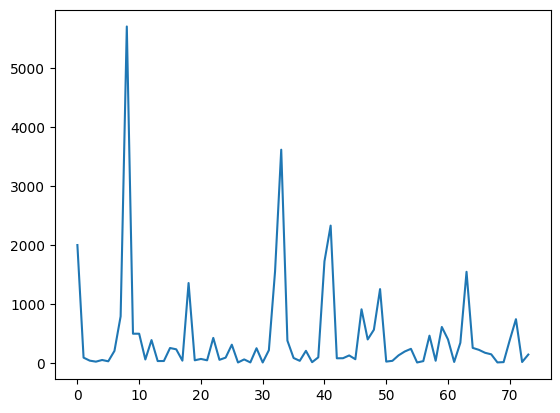

In [203]:
# POCTY BODOV V ZHLUKOCH
cluster_sizes = []
for i in set(labels):
   cluster_sizes.append((i, labels.tolist().count(i)))
plt.figure()
plt.plot([x for x in range(max(labels)+2)],[x[1] for x in cluster_sizes])
plt.show()

In [204]:
print(len(np.array(geom.points)))
stromy_bez_neklasifikovanych = [x for i,x in enumerate(np.array(geom.points)) if labels[i] != -1]
labels = np.array([x for x in labels if x != -1])
print(len(labels))
print(len(stromy_bez_neklasifikovanych))
geom.points = o3d.utility.Vector3dVector(stromy_bez_neklasifikovanych)

33678
33534
33534


In [205]:
clusters_sorted = sorted(cluster_sizes,key=lambda x: x[1],reverse=True)
clusters_sizes_sorted = [x[1] for x in clusters_sorted]

najvecsie = nadpriemerne_indexy_tried = [x[0] for x in clusters_sorted if x[1] == clusters_sizes_sorted[0]]

nove_body = []
for index,bod in enumerate(stromy_bez_neklasifikovanych):
    if labels[index] == 8:
        nove_body.append(bod)


print(nove_body)
geom2 = o3d.geometry.PointCloud()
geom2.points = o3d.utility.Vector3dVector(nove_body)
o3d.visualization.draw_geometries([geom2])

[array([-4.39930260e+07, -1.24459002e+08,  2.54520000e+04]), array([-4.39931230e+07, -1.24458997e+08,  2.52860000e+04]), array([-4.39931940e+07, -1.24458953e+08,  2.54240000e+04]), array([-4.39931940e+07, -1.24458922e+08,  2.53870000e+04]), array([-4.39931420e+07, -1.24458684e+08,  2.57460000e+04]), array([-4.39931920e+07, -1.24458884e+08,  2.53560000e+04]), array([-4.39931430e+07, -1.24458654e+08,  2.57010000e+04]), array([-4.39931440e+07, -1.24458626e+08,  2.56550000e+04]), array([-4.39931540e+07, -1.24458638e+08,  2.55340000e+04]), array([-4.39931540e+07, -1.24458604e+08,  2.54960000e+04]), array([-4.39931560e+07, -1.24458585e+08,  2.54340000e+04]), array([-4.39931470e+07, -1.24458516e+08,  2.54680000e+04]), array([-4.39931430e+07, -1.24458471e+08,  2.54580000e+04]), array([-4.39931680e+07, -1.24458571e+08,  2.52600000e+04]), array([-4.39931620e+07, -1.24458518e+08,  2.52680000e+04]), array([-4.39931550e+07, -1.24458459e+08,  2.52820000e+04]), array([-4.39931470e+07, -1.24458397e+08

In [226]:
labels2 = np.array(geom2.cluster_dbscan(150, 10))
for label in labels2:
    if label == -1:
        random_colors.append([0,0,0])
    else:    
        print("here")
        label += 1000
        print(label)
        random_colors.append([0.5,0.5, 0.5])
print(len(labels))

points = geom.points
print(len(points))

points_with_labels = []
labels_of_avg = []
counter = 0
print("lenL",len(labels))
for index,bod in enumerate(points):
    points_with_labels.append((bod,labels[index]))
# print(labels_of_avg)

points_with_labels2 = []
for index,bod in enumerate(nove_body):
        points_with_labels2.append((bod,labels2[index]))


here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000
here
1000


In [ ]:
print(len(points_with_labels))
print(len(points_with_labels2))
for index,point in enumerate(points_with_labels):
    for index2,new_point in enumerate(points_with_labels2):
        if point[0][0] == new_point[0][0] and point[0][1] == new_point[0][1] and point[0][2] == new_point[0][2]:
            points_with_labels[index] = (points_with_labels2[index2])

In [225]:

print(points_with_labels[0])
         
geom3 = o3d.geometry.PointCloud()
geom3.points = o3d.utility.Vector3dVector(points)
for label in points_with_labels:
    if label[1] == -1:
        random_colors.append([0,0,0])
    else:    
        random_colors.append([random.random()*0.8 +0.2,random.random()*0.8 +0.2,random.random()*0.8 +0.2])
print(colors)

colors = [random_colors[x[1]] for x in points_with_labels]
geom3.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([geom3])



(array([-4.39850040e+07, -1.24465628e+08,  2.55160000e+04]), 0)
[[0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.265698804385229, 0.9698751637156773, 0.23136425082503145], [0.26

In [ ]:
# CLUSTRE S POCTOM BODOV VACSIM AKO PRIEMER
clusters_sorted = sorted(cluster_sizes,key=lambda x: x[1],reverse=True)
clusters_sizes_sorted = [x[1] for x in clusters_sorted]
priemer = np.average(clusters_sizes_sorted) 
nadpriemerne_indexy_tried = [x[0] for x in clusters_sorted if x[1] > priemer*2]
nadpriemerne_body = []
for index,bod in enumerate(stromy_bez_neklasifikovanych):
    if labels[index] in nadpriemerne_indexy_tried:
        nadpriemerne_body.append(bod)
geom.points = o3d.utility.Vector3dVector(nadpriemerne_body)
o3d.visualization.draw_geometries([geom])


NameError: name 'cluster_sizes' is not defined

In [ ]:
najvacsie_clustre = []
for _ in range(len(nadpriemerne_indexy_tried)):
    indexy_aktualneho_clustera = [x for x in range(len(np.array(geom.points))) if labels[x] == nadpriemerne_indexy_tried[_]]
    if(len(indexy_aktualneho_clustera) > 0):
        najvacsie_clustre.append(np.array(geom.points)[indexy_aktualneho_clustera])

for cluster in najvacsie_clustre:
    cluster = np.array(cluster)
    geom.points = o3d.utility.Vector3dVector(cluster)
    minus_jednotky_v_triedach = True
    while minus_jednotky_v_triedach:
        eps = random.randint(10,500)
        min_points = random.randint(1,30)
        labels = np.array(geom.cluster_dbscan(eps, min_points))
        minus_jednotky_v_triedach = labels.tolist().count(-1) > 0
            
    for label in labels:
        if label == -1:
            random_colors.append([0,0,0])
        else:    
            random_colors.append([random.random()*0.8 +0.2,random.random()*0.8 +0.2,random.random()*0.8 +0.2])
    colors = [random_colors[x] for x in labels]
    geom.colors = o3d.utility.Vector3dVector(colors)
    o3d.visualization.draw_geometries([geom])


[array([[-4.39889330e+07, -1.24453915e+08,  2.54020000e+04],
       [-4.39889770e+07, -1.24454081e+08,  2.50530000e+04],
       [-4.39889710e+07, -1.24454031e+08,  2.50570000e+04],
       ...,
       [-4.39848120e+07, -1.24451422e+08,  2.52210000e+04],
       [-4.39848380e+07, -1.24451457e+08,  2.49300000e+04],
       [-4.39848210e+07, -1.24451364e+08,  2.50270000e+04]])]


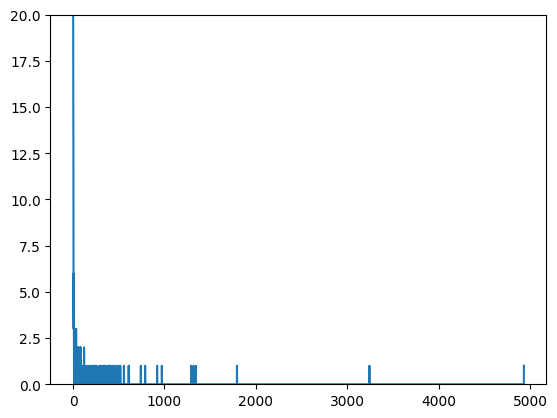

In [ ]:
# POCTY BODOV V ZHLUKOCH BEZ ZHLUKU -1
clusters_sorted = sorted(cluster_sizes,key=lambda x: x[1],reverse=True)
najvacsie = clusters_sorted[0][1]
pocty_clustrov = np.zeros(najvacsie)
for index,pocet in enumerate(cluster_sizes):
   pocty_clustrov[pocet[1] -1]+=1
#pocty_clustrov_pre_body.append((i, labels.tolist().count(i)))
plt.figure()
plt.plot(range(len(pocty_clustrov)),pocty_clustrov)
plt.ylim(0,20)
plt.show()